# Pipeline Part 2
The purpose of this notebook is to utilize new features engineered in Feature_Engineering.ipynb for use in the modeling pipeline, in order to compare the results to pipeline_architecture.ipynb.

## Initial Setup

Importing packages:

In [1]:
import pickle
from sqlalchemy import create_engine
import pandas as pd
from importlib import reload
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline

Importing the regression and classification functions:

In [3]:
from location_regression_functions import *
from pitch_cat_functions import *

Importing the functions from the pipeline script:

In [4]:
from classification_location_combo_2 import *

Pickling in initial data to work with:

In [5]:
pwd

'/Users/patrickbovard/Documents/GitHub/metis_final_project/Pitch_Classification'

In [6]:
with open('../Data/train_df_clusters.pickle','rb') as read_file:
    pitch_df = pickle.load(read_file)

In [7]:
pitch_df.head()

,inning,batter_id,pitcher_id,top,ab_id,p_score,stand,p_throws,event,home_team,...,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate,Cluster
0,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pitch_df.shape

(2848371, 49)

In [9]:
pitch_df.isnull().sum()

inning                   0
batter_id                0
pitcher_id               0
top                      0
ab_id                    0
p_score                  0
stand                    0
p_throws                 0
event                    0
home_team                0
away_team                0
b_score                  0
on_1b                    0
on_2b                    0
on_3b                    0
px                       0
pz                       0
zone                     0
pitch_type               0
start_speed              0
type                     0
b_count                  0
s_count                  0
outs                     0
pitch_num                0
last_pitch_type       3232
last_pitch_px         3232
last_pitch_pz         3232
last_pitch_speed      3214
pitcher_full_name        0
pitcher_run_diff         0
hitter_full_name         0
Date_Time_Date           0
Season                   0
cumulative_pitches       0
cumulative_ff_rate       0
cumulative_sl_rate       0
c

In [10]:
pitch_df.head(10)

,inning,batter_id,pitcher_id,top,ab_id,p_score,stand,p_throws,event,home_team,...,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate,Cluster
0,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,518792,452657,1.0,2.015000e+09,0.0,L,L,Double,chn,...,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7,1.0,518792,452657,1.0,2.015000e+09,0.0,L,L,Double,chn,...,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0
8,1.0,407812,452657,1.0,2.015000e+09,0.0,R,L,Single,chn,...,0.125000,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,407812,452657,1.0,2.015000e+09,0.0,R,L,Single,chn,...,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pickling in the new feature engineering data:

In [11]:
with open('../Data/new_pitch_rates.pickle','rb') as read_file:
    new_rate_df = pickle.load(read_file)

In [12]:
new_rate_df.head()

,pitcher_id,batter_id,event,pitcher_full_name,pitch_type,Season,last_100_ff,last_100_sl,last_100_ft,last_100_ch,...,avg_pz_ch,avg_pz_cu,avg_pz_si,avg_pz_fc,avg_pz_kc,avg_pz_fs,avg_pz_kn,avg_pz_ep,avg_pz_fo,avg_pz_sc
0,452657,572761,Groundout,Jon Lester,FF,2015,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,452657,572761,Groundout,Jon Lester,FF,2015,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,452657,572761,Groundout,Jon Lester,FF,2015,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452657,572761,Groundout,Jon Lester,FF,2015,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452657,572761,Groundout,Jon Lester,CU,2015,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ONly taking the rates prior to 2019 to use with the training/validation data:

In [13]:
rates_pre_2019 = new_rate_df[new_rate_df.Season != 2019]
rates_pre_2019.shape

(2848371, 45)

In [14]:
rates_pre_2019.head(10)

,pitcher_id,batter_id,event,pitcher_full_name,pitch_type,Season,last_100_ff,last_100_sl,last_100_ft,last_100_ch,...,avg_pz_ch,avg_pz_cu,avg_pz_si,avg_pz_fc,avg_pz_kc,avg_pz_fs,avg_pz_kn,avg_pz_ep,avg_pz_fo,avg_pz_sc
0,452657,572761,Groundout,Jon Lester,FF,2015,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,452657,572761,Groundout,Jon Lester,FF,2015,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,452657,572761,Groundout,Jon Lester,FF,2015,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452657,572761,Groundout,Jon Lester,FF,2015,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452657,572761,Groundout,Jon Lester,CU,2015,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,452657,572761,Groundout,Jon Lester,FF,2015,4,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,452657,518792,Double,Jon Lester,FF,2015,5,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,452657,518792,Double,Jon Lester,FC,2015,6,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,452657,407812,Single,Jon Lester,FF,2015,6,0,0,0,...,NaN,NaN,NaN,2.047,NaN,NaN,NaN,NaN,NaN,NaN
9,452657,407812,Single,Jon Lester,FF,2015,7,0,0,0,...,NaN,NaN,NaN,2.047,NaN,NaN,NaN,NaN,NaN,NaN


The indices match up, so i'll be droppping out the name/id columns to prevent duplicates.

In [15]:
rates_pre_2019.drop(columns=['pitcher_id', 'batter_id', 'event', 'pitcher_full_name', 'pitch_type', 'Season', 'event'], inplace=True)

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Merging Dataframes:

In [16]:
merged_rate_df = pitch_df.merge(rates_pre_2019, how='left', left_index=True, right_index=True)

In [17]:
merged_rate_df.shape

(2848371, 88)

In [18]:
merged_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 88 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

Px and Pz running averages weren't computed right in SQL, just working without them for now.

In [19]:
right_rates = merged_rate_df.iloc[:, 0:62]

In [20]:
right_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 62 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

In order to utilize the new last_100 columns, created a new function file classification_location_combo-2.py. I'll also remove the following columns from the regression problems, to try to remove some features that may not factor as heavily in location:
- 'cumulative_ff_rate', 'cumulative_sl_rate', 'cumulative_ft_rate',
       'cumulative_ch_rate', 'cumulative_cu_rate', 'cumulative_si_rate',
       'cumulative_fc_rate', 'cumulative_kc_rate', 'cumulative_fs_rate',
       'cumulative_kn_rate', 'cumulative_ep_rate', 'cumulative_fo_rate',
       'cumulative_sc_rate'

### Running on the same pitcher list as in pipeline_architecture.ipynb:

In [21]:
right_rates = right_rates[right_rates.pitch_type != 'EP']

In [22]:
pitcher_list = right_rates.pitcher_full_name.value_counts().head(10).index

In [23]:
pitcher_list

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran'],
      dtype='object')

### Random Forest:

In [24]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2)

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834
Accuracy: 0.5171116961263633
Precision: (0.3341094910887008,)
Recall: 0.21984392534428002
Random Forest Pitch Classification confusion matrix results:
[[1216  122   27   11   12    2]
 [ 382  121    8    0    1    1]
 [ 319   23   22    7    5    1]
 [ 196   11    7    5    3    0]
 [ 119    1    8    1   10    0]
 [  11    6    0    0    0    1]]
Val Px R^2: 0.06177801691822393
Val Px MAE: 0.6806858884329546 ft.
Val Pz R^2: 0.14149781991448418
Val Pz MAE: 0.6269281321988713 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5967429236138038
Precision: (0.23379790382795965,)
Recall: 0.19313151963348485
Random Forest Pitch Classification confusion matrix results:
[[1436   54   29    2    0    0]
 [ 411   78   17    1    0    0]
 [ 350   35   25    1    0    0]
 [ 122    2    6    0    0    0]
 [   9    0    0    0    0    0]
 [   1    0    0    0    0    0]]
Val Px R^2: 0.09143301307543039
Val Px MAE: 0.6127574120323364 ft.
Val Pz R^2: 0.16776575922014159
Val Pz MAE: 0.6847511413854542 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
Accuracy: 0.5736882716049383
Precision: (0.36896303199751473,)
Recall: 0.31966183054516895
Random Forest Pitch Classification confusion matrix results:
[[843 365  11   8   2]
 [443 621   8  12   0]
 [150  64  10   3   0]
 [  9  21   1  13   0]
 [  5   2   0   1   0]]
Val Px R^2: 0.17496207872982905
Val Px MAE: 0.567108931643586 ft.
Val Pz R^2: 0.10499718678284686
Val Pz MAE: 0.7870902506781031 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001
Accuracy: 0.4853824589507409
Precision: (0.35795395235832667,)
Recall: 0.31872073317936517
Random Forest Pitch Classification confusion matrix results:
[[906 192  60   6  33]
 [399 169  50  11  21]
 [118  32 107   0   0]
 [136  41  21   3   7]
 [115  41   0   2  27]]
Val Px R^2: -0.027337085114912174
Val Px MAE: 0.6580227548483484 ft.
Val Pz R^2: 0.03172061247295521
Val Pz MAE: 0.728746958890673 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
Accuracy: 0.48286981056025796
Precision: (0.4550179960231226,)
Recall: 0.45732072559603776
Random Forest Pitch Classification confusion matrix results:
[[622  99 102  31]
 [236 220  55 167]
 [237  84 129  69]
 [ 17 155  31 227]]
Val Px R^2: 0.023482397626435336
Val Px MAE: 0.7014240776841653 ft.
Val Pz R^2: 0.008645931495986359
Val Pz MAE: 0.6704010406087011 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'PO': 6, 'SI': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.40896245458215585
Precision: (0.28739934283242985,)
Recall: 0.26360140283186845
Random Forest Pitch Classification confusion matrix results:
[[539 159  55  24  20   0]
 [202 336  51  34  23   0]
 [180 113  80  23  13   0]
 [153 122  31  27  11   0]
 [113  91  31  13  31   0]
 [  0   2   0   0   0   0]]
Val Px R^2: 0.016093312381706304
Val Px MAE: 0.6477884072447895 ft.
Val Pz R^2: 0.062027100445157135
Val Pz MAE: 0.7290101625359477 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
Accuracy: 0.46129541864139023
Precision: (0.30426405609941587,)
Recall: 0.24045440660697684
Random Forest Pitch Classification confusion matrix results:
[[992 130  35  17   5]
 [419 139  25  12   3]
 [254  60  25   6   2]
 [181  33   1   9   1]
 [130  40   6   4   3]]
Val Px R^2: 0.06896602247008177
Val Px MAE: 0.7180069778848877 ft.
Val Pz R^2: 0.16325272718338268
Val Pz MAE: 0.6026983116192999 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
Accuracy: 0.3704746580852776
Precision: (0.3493046707956737,)
Recall: 0.3047687509536838
Random Forest Pitch Classification confusion matrix results:
[[432 120  67  87  71   8]
 [216 184  44  41  47   1]
 [161  65  74  63  30   1]
 [148  26  41 100   0   0]
 [125  59   9   0 126   3]
 [ 65  16   8  19  24   5]]
Val Px R^2: 0.10855228790024818
Val Px MAE: 0.6503795973357457 ft.
Val Pz R^2: 0.03670731305061692
Val Pz MAE: 0.6933839112468845 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
Accuracy: 0.3968382650993109
Precision: (0.3654581949751677,)
Recall: 0.35410533914727593
Random Forest Pitch Classification confusion matrix results:
[[498 125 106  64]
 [271 314  52  64]
 [257 108 103  39]
 [194 158  50  64]]
Val Px R^2: 0.07040859135757294
Val Px MAE: 0.6816256272985992 ft.
Val Pz R^2: 0.21607188412953837
Val Pz MAE: 0.673603048747928 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
Accuracy: 0.43643184660275114
Precision: (0.3684571486752787,)
Recall: 0.28020950341411194
Random Forest Pitch Classification confusion matrix results:
[[782 130  74  14  12]
 [381 106  56   1   1]
 [229  42 134  13  11]
 [153  18  30  12   2]
 [151  17  13   4  13]]
Val Px R^2: 0.1194379026957777
Val Px MAE: 0.6892733035467166 ft.
Val Pz R^2: 0.1021421611963782
Val Pz MAE: 0.6784036873459182 ft.






### XGBoost:

In [25]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2, class_method = 'XGBoost')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834
Accuracy: 0.5110943963896202
Precision: (0.33290857982533406,)
Recall: 0.21374440154552185
Random Forest Pitch Classification confusion matrix results:
[[1210  123   32   13   10    2]
 [ 393  111    7    1    1    0]
 [ 314   27   26    3    7    0]
 [ 201    8    7    3    3    0]
 [ 118    2    7    4    8    0]
 [   9    7    1    0    0    1]]
Val Px R^2: 0.06223137217671604
Val Px MAE: 0.680581026853047 ft.
Val Pz R^2: 0.14132548483379515
Val Pz MAE: 0.6267807245908646 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6021713842574641
Precision: (0.247001065112144,)
Recall: 0.19922464251492888
Random Forest Pitch Classification confusion matrix results:
[[1432   55   33    1    0    0]
 [ 405   88   14    0    0    0]
 [ 339   39   33    0    0    0]
 [ 120    7    3    0    0    0]
 [   8    1    0    0    0    0]
 [   1    0    0    0    0    0]]
Val Px R^2: 0.09138248312057062
Val Px MAE: 0.6128272006674078 ft.
Val Pz R^2: 0.16775045166422464
Val Pz MAE: 0.684748464067779 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
Accuracy: 0.5802469135802469
Precision: (0.37298843470965937,)
Recall: 0.32833474630838644
Random Forest Pitch Classification confusion matrix results:
[[853 353  12  10   1]
 [436 625   8  15   0]
 [152  60  12   3   0]
 [  9  20   1  14   0]
 [  4   3   0   1   0]]
Val Px R^2: 0.17507989223159737
Val Px MAE: 0.567064513637559 ft.
Val Pz R^2: 0.10504240549486976
Val Pz MAE: 0.7870736722938958 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001
Accuracy: 0.4853824589507409
Precision: (0.35954902457582855,)
Recall: 0.3160875180676532
Random Forest Pitch Classification confusion matrix results:
[[911 192  61   5  28]
 [407 169  45   3  26]
 [118  37 101   1   0]
 [139  36  25   2   6]
 [107  46   0   3  29]]
Val Px R^2: -0.014374501849233168
Val Px MAE: 0.6544876492836068 ft.
Val Pz R^2: 0.03284883920791759
Val Pz MAE: 0.7282498114734982 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
Accuracy: 0.48286981056025796
Precision: (0.45116030231156823,)
Recall: 0.45977370182984767
Random Forest Pitch Classification confusion matrix results:
[[631  85 107  31]
 [240 200  50 188]
 [248  76 121  74]
 [ 16 135  33 246]]
Val Px R^2: 0.023609768614850757
Val Px MAE: 0.7016708545431004 ft.
Val Pz R^2: 0.008840161108011002
Val Pz MAE: 0.6703864549171239 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'PO': 6, 'SI': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.42309245054501415
Precision: (0.3032749630732066,)
Recall: 0.27393742494681705
Random Forest Pitch Classification confusion matrix results:
[[564 138  52  24  19   0]
 [214 334  41  36  21   0]
 [183 105  81  27  13   0]
 [146 113  36  39  10   0]
 [111  87  35  16  30   0]
 [  0   2   0   0   0   0]]
Val Px R^2: 0.021447793875081778
Val Px MAE: 0.6463104897225487 ft.
Val Pz R^2: 0.061464195082058914
Val Pz MAE: 0.7295830389381568 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
Accuracy: 0.46011058451816744
Precision: (0.28233276676205427,)
Recall: 0.23795995671591302
Random Forest Pitch Classification confusion matrix results:
[[999 119  40  14   7]
 [435 130  23   9   1]
 [265  51  23   5   3]
 [174  32   6  12   1]
 [123  41  13   5   1]]
Val Px R^2: 0.07071272699115816
Val Px MAE: 0.7168469099160203 ft.
Val Pz R^2: 0.16277578359213385
Val Pz MAE: 0.6026361753460611 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
Accuracy: 0.3813354786806114
Precision: (0.3644727048696677,)
Recall: 0.3158334943116754
Random Forest Pitch Classification confusion matrix results:
[[445 127  65  82  57   9]
 [210 183  41  43  55   1]
 [152  67  80  64  30   1]
 [141  28  43 102   0   1]
 [130  48  10   0 131   3]
 [ 57  18  10  18  27   7]]
Val Px R^2: 0.10869450801634595
Val Px MAE: 0.6500323427790393 ft.
Val Pz R^2: 0.03735132135607022
Val Pz MAE: 0.693332889345746 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
Accuracy: 0.40575597892176735
Precision: (0.38265924517848443,)
Recall: 0.3630610052779132
Random Forest Pitch Classification confusion matrix results:
[[516 129  92  56]
 [277 306  55  63]
 [255 113 110  29]
 [202 145  50  69]]
Val Px R^2: 0.07633597844155715
Val Px MAE: 0.6787948548454812 ft.
Val Pz R^2: 0.21651509267485958
Val Pz MAE: 0.6729782055006109 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
Accuracy: 0.4451854939558149
Precision: (0.3911206936811978,)
Recall: 0.29055323008876316
Random Forest Pitch Classification confusion matrix results:
[[795 122  72  11  12]
 [375 112  55   2   1]
 [228  50 126  12  13]
 [137  18  36  22   2]
 [145  16  16   8  13]]
Val Px R^2: 0.11849501049400635
Val Px MAE: 0.6895554261231204 ft.
Val Pz R^2: 0.10140029383441507
Val Pz MAE: 0.6786585162442099 ft.






This doesn't look to be much better performing than the previous run of models.

# Px/Py Outliers:

Here I'll check to see what the outlier situation looks like for Px/Py:

In [26]:
output_df.px.describe()

count    25169.000000
mean         0.041079
std          0.867177
min         -4.435097
25%         -0.546000
50%          0.052534
75%          0.639370
max          4.638494
Name: px, dtype: float64

In [27]:
output_df.pz.describe()

count    25169.000000
mean         2.322657
std          0.931682
min         -1.755906
25%          1.722934
50%          2.323000
75%          2.928965
max          6.680000
Name: pz, dtype: float64

### Box Plots:

Plotting out a box plot:

Text(0.5, 1.0, 'Pz Box Plot')

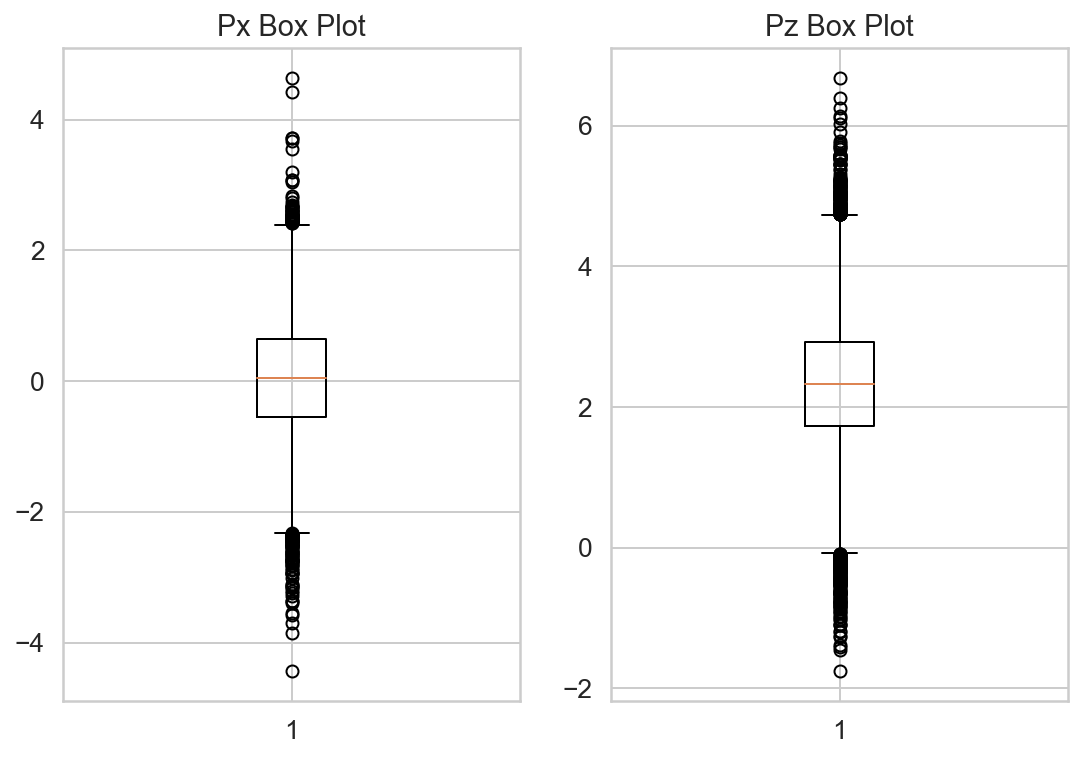

In [28]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.boxplot(output_df.px)
plt.title('Px Box Plot')
plt.subplot(1,2,2)
plt.boxplot(output_df.pz)
plt.title('Pz Box Plot')

Looking at the box plot, there are a good amount of outliers.  Looking at these, for px these are pitches that would be about 1.5 feet off the strikezone (edge of strikezone at ~+/- 0.71, since the plate is 17" wide).  Thus, these are pitches that should be obvious not to swing at.  

For pz, the lower whisker is below 0, meaning the pitch is hitting the ground before homeplate.  The upper whisker is at ~4.5, which would be ~1 foot over the top of the zone on the average strikezone.  AGain, these should be obvious pitches to not swing at.

### Histograms

Here I'll check out a histogram to see if they are somewhat normally distributed, although the box plots seem to somewhat suggest this.

Text(0.5, 1.0, 'Pz Histogram')

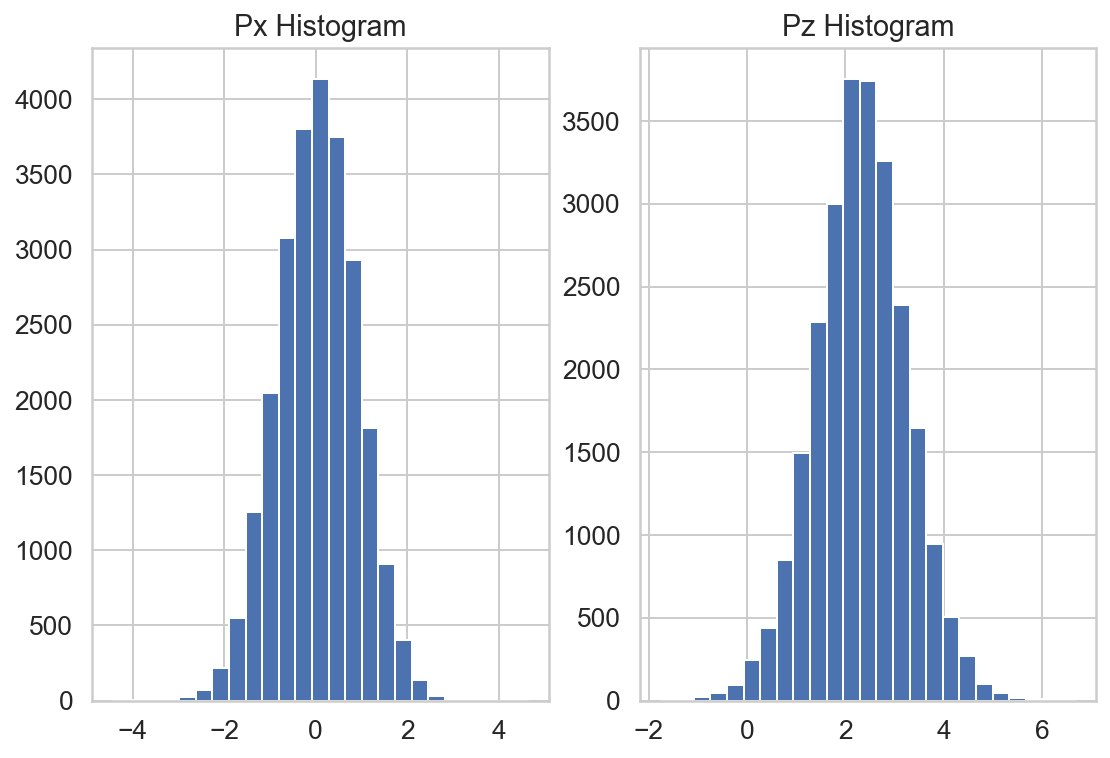

In [29]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(output_df.px, bins=25)
plt.title('Px Histogram')
plt.subplot(1,2,2)
plt.hist(output_df.pz, bins=25)
plt.title('Pz Histogram')

They do seem to be relatively normally distributed, outward from the middle of the strikezone (Px = 0, Pz = ~2).

# Removing outliers

For this, I'll be trying to retrain a model with outliers beyond the whiskers removed from px and pz.

In [30]:
#Defining interquartile range for Px and pz:
px_iqr = right_rates.px.quantile(0.75) - right_rates.px.quantile(0.25)
pz_iqr = right_rates.pz.quantile(0.75) - right_rates.pz.quantile(0.25)

#Whiskers are at 1.5 above and below the 25th/75th percentile:
px_lower = right_rates.px.quantile(0.25) - 1.5*px_iqr
px_upper = right_rates.px.quantile(0.75) + 1.5*px_iqr

pz_lower = right_rates.pz.quantile(0.25) - 1.5*pz_iqr
pz_upper = right_rates.pz.quantile(0.75) + 1.5*pz_iqr
print(px_lower, px_upper)
print(pz_lower, pz_upper)

-2.384767786437216 2.4024229311831817
-0.16456648820112219 4.671610813668537


Filtering the right_rates dataframe for these values.  How many rows are beyond for each?

In [31]:
right_rates.shape[0] - right_rates[(right_rates.px > px_lower) & (right_rates.px < px_upper)].shape[0]

15815

In [32]:
right_rates.shape[0] - right_rates[(right_rates.pz > pz_lower) & (right_rates.pz < pz_upper)].shape[0]

40102

In [33]:
right_rates.shape[0]

2847555

About 16k and 40k, respectively, out of 2.8 million.  I'll remove these and re-run the pipeline, to see if there is any effect.

In [34]:
outliers_removed = right_rates[((right_rates.px > px_lower) & (right_rates.px < px_upper)) & ((right_rates.pz > pz_lower) & (right_rates.pz < pz_upper))]

In [35]:
output_df = multiple_pitcher_predictions(pitcher_list, outliers_removed, split_size = 0.2, class_method = 'XGBoost')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2457937776106777
Accuracy: 0.5296367112810707
Precision: (0.3707224585258701,)
Recall: 0.2273587872142079
Random Forest Pitch Classification confusion matrix results:
[[1211  125   25    8   12    2]
 [ 366  130    7    1    0    1]
 [ 303   25   27    5    4    1]
 [ 192    8    6    7    0    0]
 [ 113    1    5    3    9    0]
 [  10    6    1    0    0    1]]
Val Px R^2: 0.057513601505073675
Val Px MAE: 0.6685018424907454 ft.
Val Pz R^2: 0.1320373520014052
Val Pz MAE: 0.6182237511350533 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.24915958077911807


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6226190476190476
Precision: (0.2652336647044249,)
Recall: 0.19337521987387227
Random Forest Pitch Classification confusion matrix results:
[[1480   51   32    4    0    0]
 [ 373   70   17    1    0    0]
 [ 321   30   17    1    0    0]
 [ 102    7    1    2    0    0]
 [   7    1    0    0    0    0]
 [   3    0    0    0    0    0]]
Val Px R^2: 0.09191666785529584
Val Px MAE: 0.5985887544303641 ft.
Val Pz R^2: 0.17270090600150945
Val Pz MAE: 0.6464099861200209 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.25790754257907544
Accuracy: 0.5683962264150944
Precision: (0.3974512803352614,)
Recall: 0.3281592678285771
Random Forest Pitch Classification confusion matrix results:
[[790 389   9   8   1]
 [428 625   7  12   0]
 [138  63  18   4   0]
 [  6  20   2  13   0]
 [  6   4   0   1   0]]
Val Px R^2: 0.18138088138306085
Val Px MAE: 0.5558531171989854 ft.
Val Pz R^2: 0.09729101406852436
Val Pz MAE: 0.7436239032757833 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'UN': 6, 'FA': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.24901664145234492
Accuracy: 0.4908869987849332
Precision: (0.34325851053999556,)
Recall: 0.3253741257047714
Random Forest Pitch Classification confusion matrix results:
[[917 157  40   5  32]
 [415 149  50  10  41]
 [109  37 111   1   0]
 [139  32  22   0   3]
 [133  30   0   1  35]]
Val Px R^2: -0.037961924997250485
Val Px MAE: 0.6517959565185116 ft.
Val Pz R^2: 0.013237969797460614
Val Pz MAE: 0.6974690859606224 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24589511394168573
Accuracy: 0.46904087414002427
Precision: (0.4446638839140117,)
Recall: 0.45645875600200436
Random Forest Pitch Classification confusion matrix results:
[[588 108 101  37]
 [247 202  56 179]
 [265  84 123  70]
 [ 10 126  29 246]]
Val Px R^2: 0.017764793327859185
Val Px MAE: 0.6715515215416523 ft.
Val Pz R^2: 0.0034549253666713575
Val Pz MAE: 0.6452937716572359 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'PO': 6, 'SI': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24761324395693682
Accuracy: 0.42083675143560295
Precision: (0.34309992566410247,)
Recall: 0.32327661971092353
Random Forest Pitch Classification confusion matrix results:
[[558 168  47  26  24]
 [203 324  48  37  24]
 [145  94  88  16  17]
 [142 115  44  26  16]
 [111  86  30  19  30]]
Val Px R^2: 0.026201016167457403
Val Px MAE: 0.615796310352692 ft.
Val Pz R^2: 0.06676431631786783
Val Pz MAE: 0.7064103109450367 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.24186093247588425
Accuracy: 0.4673867885334441
Precision: (0.3262475060116414,)
Recall: 0.24721621544906608
Random Forest Pitch Classification confusion matrix results:
[[957 121  31  19   4]
 [410 127  20  13   7]
 [243  34  19   3   8]
 [175  35   5  15   3]
 [111  31   7   2   7]]
Val Px R^2: 0.07710598819064751
Val Px MAE: 0.7001720579244719 ft.
Val Pz R^2: 0.19409800793483156
Val Pz MAE: 0.5667859504137762 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.24817813765182187
Accuracy: 0.36174551386623166
Precision: (0.3258396409843019,)
Recall: 0.2944879308052958
Random Forest Pitch Classification confusion matrix results:
[[437 128  59  86  80   4]
 [193 168  34  50  63   4]
 [170  72  61  62  26   2]
 [139  21  42  99   0   4]
 [131  57   5   0 118   0]
 [ 65  21   8  12  27   4]]
Val Px R^2: 0.10471162816100343
Val Px MAE: 0.6487150425935997 ft.
Val Pz R^2: 0.03875987020747018
Val Pz MAE: 0.676162350259013 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.24457917994039666
Accuracy: 0.40630252100840336
Precision: (0.37730323397005244,)
Recall: 0.35955561700386685
Random Forest Pitch Classification confusion matrix results:
[[522 135  70  51]
 [254 290  47  70]
 [263  97  88  34]
 [202 145  45  67]]
Val Px R^2: 0.052487574934372505
Val Px MAE: 0.6609845377073987 ft.
Val Pz R^2: 0.19641873866764104
Val Pz MAE: 0.6558873678155853 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24285564744059457
Accuracy: 0.4379310344827586
Precision: (0.346280759688966,)
Recall: 0.27593125952974945
Random Forest Pitch Classification confusion matrix results:
[[770 114  77  12  16]
 [368  99  51   3   3]
 [223  39 127   5  12]
 [140  16  30  12   7]
 [148  15  20   5   8]]
Val Px R^2: 0.14112991053948043
Val Px MAE: 0.6586424776014738 ft.
Val Pz R^2: 0.09663253055769427
Val Pz MAE: 0.6320063461462799 ft.






Seems to be performing at a slightly better level across the board, although it doesn't seem to be majorly different.